In [1]:
import numpy
import pandas
import control
import scipy.signal as sig
import scipy.integrate as it
import matplotlib.pyplot as plt

# FOPDT Fit Parameters

In [2]:
Kp = 0.7
θ = 8
τp = 180

ω = numpy.logspace(-4, 2, 3000)

s = 1j*ω

Function = Kp * numpy.exp(-θ*s) / (τp*s + 1)

# Bode Plotter

In [3]:
def Bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    
    ax_mag.loglog(ω, numpy.abs(G))
    ax_mag.axvline(x = 22.3003, color = 'black', linestyle = '--')
    ax_mag.axvline(x = 1/100, color = 'red', linestyle = '--')
    
    ax_phase.semilogx(ω, numpy.unwrap(numpy.angle(G)))
    ax_phase.axvline(x = 22.3003, color = 'black', linestyle = '--')
    ax_phase.axvline(x = 1/100, color = 'red', linestyle = '--', label = 'corner ω')
    ax_phase.axhline(y = -180, color = 'black', linestyle = '--', label = 'critical ω')
    
    plt.legend(loc = 'best')
    plt.show()

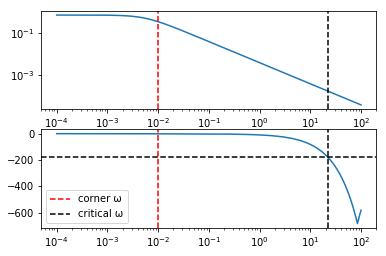

0.38921365918249146

In [4]:
Bode(Function)

ωVal = 22.3003 * numpy.pi/180
ωVal

# Omega Array

In [5]:
ωArr = [10**(-3.5), 10**(-3), 10**(-2.5), 10**(-1.5), 10**(-1), 10**(-0.5)]

ARArray = []
ϕArray = []

for value in ωArr:
    ARArray.append(Kp/(numpy.sqrt(value**2 * τp**2 + 1)))
    ϕArray.append(-numpy.arctan(value*τp))

# TCLab Function

### TCLab Instantiation

In [6]:
t_end = 300

In [228]:
from tclab import TCLab, clock, Historian, Plotter, setup

TArr = []
QArr = []

TCLab = setup(connected = True)

with TCLab() as lab:
    has = Historian(lab.sources)
    for t in clock(1):
        lab.Q1(0)
        lab.Q2(0)
        has.update(t)
        
TIn = numpy.array(has.log)[0]

TS1, TS2 = TIn[1], TIn[2]

print()
print('Sensor Temperatures')

print('TS1:', TS1, '°C')
print('TS2:', TS2, '°C')

TCLab version 0.4.9
NHduino connected on port COM3 at 115200 baud.
TCLab Firmware 1.4.3 Arduino Uno.
TCLab disconnected successfully.

Sensor Temperatures
TS1: 31.86 °C
TS2: 25.74 °C


### Function

In [26]:
A = 1

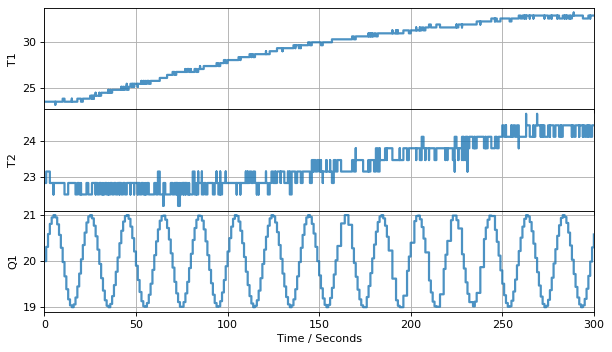

TCLab disconnected successfully.


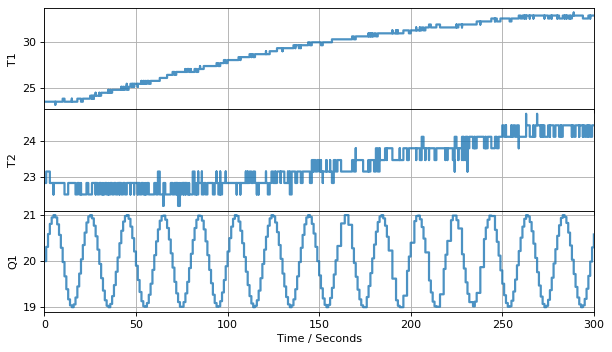

In [231]:
with TCLab() as lab:
    his = Historian(lab.sources)
    
    Plot = Plotter(his, twindow=t_end, layout=(('T1',), ('T2',), ('Q1',)))
    
    for t in clock(t_end):
        
        if(t >= 0 and t <= t_end):
            lab.Q1(20 + A*numpy.sin(ωArr[5]*t))
            
            Plot.update(t)
            his.update(t)
        
    his.load_session(1)
    his.to_csv('Omega6.csv')

# Random Noise

In [232]:
tNew = 600
Interval = 60

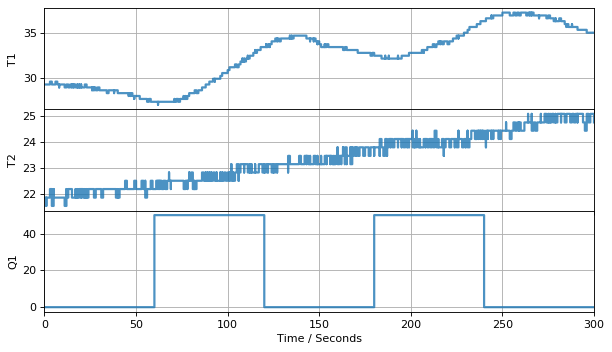

TCLab disconnected successfully.


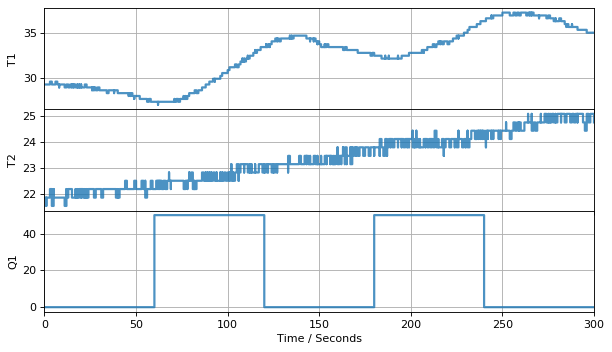

In [300]:
with TCLab() as lab:
    his = Historian(lab.sources)
    
    Plot = Plotter(his, twindow=t_end, layout=(('T1',), ('T2',), ('Q1',)))
    
    for t in clock(t_end):
        
        if(t >= 0 and t <= Interval):
            lab.Q1(0)
            
            Plot.update(t)
            his.update(t)
            
        if(t >= Interval and t <= 2*Interval):
            lab.Q1(50)
            
            Plot.update(t)
            his.update(t)

        if(t >= 2*Interval and t <= 3*Interval):
            lab.Q1(0)
            
            Plot.update(t)
            his.update(t)
            
        if(t >= 3*Interval and t <= 4*Interval):
            lab.Q1(50)
            
            Plot.update(t)
            his.update(t)
            
        if(t >= 4*Interval and t <= 5*Interval):
            lab.Q1(0)
            
            Plot.update(t)
            his.update(t)

        if(t >= 5*Interval and t <= 6*Interval):
            lab.Q1(50)
            
            Plot.update(t)
            his.update(t)
            
        if(t >= 6*Interval and t <= 7*Interval):
            lab.Q1(0)
            
            Plot.update(t)
            his.update(t)
        
        if(t >= 7*Interval and t <= 8*Interval):
            lab.Q1(50)
            
            Plot.update(t)
            his.update(t)
            
        if(t >= 8*Interval and t <= 9*Interval):
            lab.Q1(0)
            
            Plot.update(t)
            his.update(t)
            
        if(t >= 9*Interval and t <= tNew):
            lab.Q1(50)
            
            Plot.update(t)
            his.update(t)
            
    his.load_session(1)
    his.to_csv('Random Pulses.csv')

In [7]:
Data1 = pandas.read_csv('Omega1.csv')
Data2 = pandas.read_csv('Omega2.csv')
Data3 = pandas.read_csv('Omega3.csv')
Data4 = pandas.read_csv('Omega4.csv')
Data5 = pandas.read_csv('Omega5.csv')
Data6 = pandas.read_csv('Omega6.csv')

### Temperature Plot

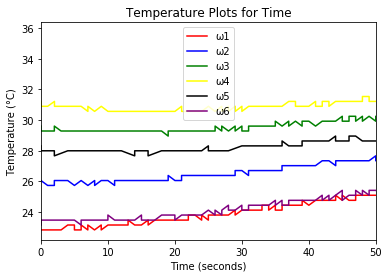

In [8]:
plt.title('Temperature Plots for Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')

plt.plot(Data1.Time, Data1.T1, color = 'red', label = 'ω1')
plt.plot(Data2.Time, Data2.T1, color = 'blue', label = 'ω2')
plt.plot(Data3.Time, Data3.T1, color = 'green', label = 'ω3')
plt.plot(Data4.Time, Data4.T1, color = 'yellow', label = 'ω4')
plt.plot(Data5.Time, Data5.T1, color = 'black', label = 'ω5')
plt.plot(Data6.Time, Data6.T1, color = 'purple', label = 'ω6')

plt.legend(loc = 'best')
plt.xlim(0, 50)
plt.show()

### Heat Supply Plot

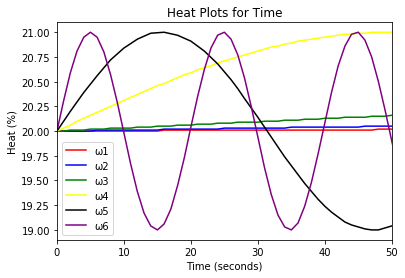

In [9]:
plt.title('Heat Plots for Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Heat (%)')

plt.plot(Data1.Time, Data1.Q1, color = 'red', label = 'ω1')
plt.plot(Data2.Time, Data2.Q1, color = 'blue', label = 'ω2')
plt.plot(Data3.Time, Data3.Q1, color = 'green', label = 'ω3')
plt.plot(Data4.Time, Data4.Q1, color = 'yellow', label = 'ω4')
plt.plot(Data5.Time, Data5.Q1, color = 'black', label = 'ω5')
plt.plot(Data6.Time, Data6.Q1, color = 'purple', label = 'ω6')

plt.legend(loc = 'best')

plt.xlim(0, 50)

plt.show()

### AR and ϕ

In [10]:
ωArr, ARArray, ϕArray

([0.00031622776601683794,
  0.001,
  0.0031622776601683794,
  0.03162277660168379,
  0.1,
  0.31622776601683794],
 [0.6988687482008576,
  0.6889283267815867,
  0.6083507495196234,
  0.12112249453604698,
  0.03882901373576603,
  0.012295849095024002],
 [-0.056859642436212936,
  -0.17809293823119754,
  -0.5174720383950805,
  -1.3968889132067546,
  -1.5152978215491797,
  -1.5532299246660362])

In [11]:
def Bode2(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    
    ax_mag.loglog(ω, numpy.abs(G), color = 'blue')
    ax_mag.plot(ωArr, ARArray, 'o', color = 'black', label = 'AR Values')
    ax_mag.axvline(x = 10**(-2), color = 'red', linestyle = '--')
    ax_mag.axvline(x = 22.3003, color = 'black', linestyle = '--')
    ax_mag.axhline(y = 10**(-3.8), color = 'black', linestyle = '--')
    ax_mag.legend(loc = 'best')
    
    ax_phase.semilogx(ω, numpy.unwrap(numpy.angle(G)), color = 'blue')
    ax_phase.plot(ωArr, ϕArray, 'o', color = 'green', label = 'phase angles')
    ax_phase.axvline(x = 22.3003, color = 'black', linestyle = '--', label = 'critical ω')
    ax_phase.axvline(x = 10**(-2), color = 'red', linestyle = '--', label = 'corner ω')
    ax_phase.axhline(y = -180, color = 'black', linestyle = '--')
    ax_phase.legend(loc = 'best')

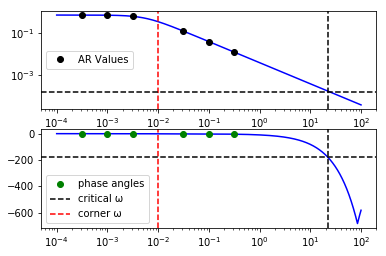

In [12]:
Bode2(Function)

## Qinput and Toutput

In [32]:
pulse = pandas.read_csv('Random Pulses.csv')

In [33]:
T1 = pulse.T1
Q1 = pulse.Q1
t = pulse.Time

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-10, 10)

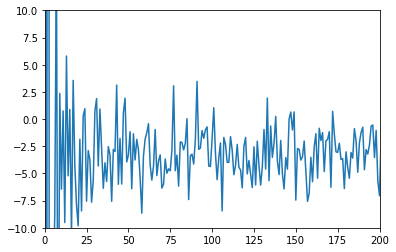

In [86]:
Tout = numpy.fft.rfft(T1)
Toutfreq = numpy.fft.rfftfreq(len(T1))

plt.plot(Tout)
plt.xlim(0, 200)
plt.ylim(-10,10)

In [71]:
def bodegain(Tout):
    
    plt.loglog(Toutfreq, numpy.abs(Tout))

In [82]:
Tmax = max(abs(Tout))

Tmax

19824.410000000003

In [75]:
def Bode3(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    
    ax_mag.loglog(ω, numpy.abs(G))
    ax_mag.axvline(x = 22.3003, color = 'black', linestyle = '--')
    ax_mag.axvline(x = 1/100, color = 'red', linestyle = '--')
    ax_mag.loglog(Toutfreq, numpy.abs(Tout))
    
    ax_phase.semilogx(ω, numpy.unwrap(numpy.angle(G)))
    ax_phase.axvline(x = 22.3003, color = 'black', linestyle = '--')
    ax_phase.axvline(x = 1/100, color = 'red', linestyle = '--', label = 'corner ω')
    ax_phase.axhline(y = -180, color = 'black', linestyle = '--', label = 'critical ω')
    
    
    plt.legend(loc = 'best')
    plt.show()

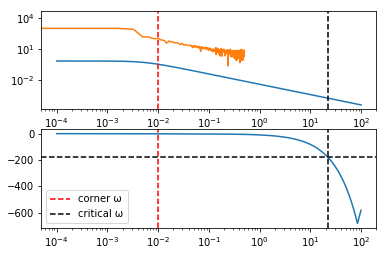

In [76]:
Bode3(Function)